__Importing the Necessary Libs__

In [190]:
import pandas as pd
import os #Read all from directory
from datetime import datetime
from plotly.graph_objs import Bar
from plotly import offline
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import iplot, init_notebook_mode
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt 

__Merging 12 months of sales data into a single file__

In [18]:
df = pd.read_csv("Data/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files=[f for f in os.listdir('Data/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame() #Create any empty data frame

for file in files:
    df = pd.read_csv("Data/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


__Write new CSV All Months Data to a new CSV__

In [19]:
all_months_data.to_csv("all_data.csv", index=False) #Index = Flase eliminated the first column (naming)


__Read in Updated dataFrame__

In [20]:
all_data =pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


__Finding out what month had the best sales? How much was earned in that month?__

### Clean up Data

In [37]:
#Drops rows of NAN
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='any')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### ADD MONTH COLUMN

In [45]:
#Add Column for Month
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


__Convert columns to correct type__

In [47]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered']) #Make int
all_data['Price Each']= pd.to_numeric(all_data['Price Each']) #Make int

__Filter out 'OR' Data__

In [44]:
temp_df = all_data[all_data['Order Date'].str[0:2] !='Or']
temp_df.head()
all_data =temp_df

__Create Column for Sales__

In [49]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


__Use a groupby function & sum up sales__

In [62]:
results=all_data.groupby('Month').sum()['Sales']


In [64]:
data = [{
	'type':'bar',
	'x':all_data['Month'],
	'y':all_data['Sales'],
	'hovertext':results,
	'marker':{
	'line': {'width':1.5, 'color': 'blue'}
	},
	'opacity':0.6,
}]
my_layout = {
	'title': 'Sales Analysis',
	'titlefont':{'size':28},
	'xaxis': {
	'title': 'Month',
	'titlefont': {'size':24},
	'tickfont': {'size':14},
	},
	'yaxis': {
	'title':'Sales ($)',
	'titlefont': {'size':24},
	'tickfont':{'size':14},
	},
}

fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='sales_analysis.html')

'sales_analysis.html'

### What City had the highest number of sales

In [97]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#tempdf=all_data['Purchase Address'].str.split(',',expand=True)

#tempdf.head()
#all_data['City']=tempdf[1]
#all_data.head()
#Another method by Keith.G
#Using Lambda for very x values between the'delimiter'

all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [99]:
City_Sales=all_data.groupby('City').sum()
City_Sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


In [100]:
data = [{
	'type':'bar',
	'x':all_data['City'],
	'y':all_data['Sales'],
	'hovertext':City_Sales,
	'marker':{
	'line': {'width':1.5, 'color': 'blue'}
	},
	'opacity':0.6,
}]
my_layout = {
	'title': 'Sales Analysis',
	'titlefont':{'size':28},
	'xaxis': {
	'title': 'City',
	'titlefont': {'size':24},
	'tickfont': {'size':14},
	},
	'yaxis': {
	'title':'Sales ($)',
	'titlefont': {'size':24},
	'tickfont':{'size':14},
	},
}

fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='sales_analysis.html')

'sales_analysis.html'

__What time should the company display ads to maximize likelihood of customers buying product__

In [105]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [109]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data['Month']=all_data['Order Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [123]:
Sales_Hour=all_data.groupby('Hour').sum()[Sales]
Sales_Hour

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


In [162]:
hour=Sales_Hour.index
hour
Sales=Sales_Hour['Sales']
Sales

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

In [164]:
trace = go.Scatter(
    x=hour,
    y=Sales,
    mode= 'lines',
)
my_layout = {
	'title': 'Sales Analysis',
	'titlefont':{'size':28},
	'xaxis': {
	'title': 'Hour',
	'titlefont': {'size':24},
	'tickfont': {'size':14},
	},
	'yaxis': {
	'title':'Sales ($)',
	'titlefont': {'size':24},
	'tickfont':{'size':14},
	},
}

data= [trace]
fig = {'data': data, 'layout': my_layout}
offline.plot(fig, filename='line_chart.html')

'line_chart.html'

__What products are most often sold together__

In [175]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df =df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

<ipython-input-175-87d4683a9a1b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [179]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


__What Product Sold the most__

In [180]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [184]:
product_group = all_data.groupby('Product')
product_orders = product_group.sum()['Quantity Ordered']
product_orders

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

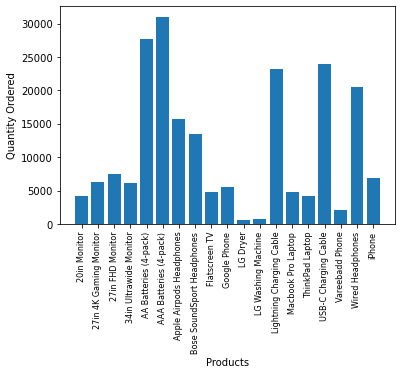

In [196]:
products = [product for product, df in product_group]

plt.bar(products, product_orders)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [186]:
prices = all_data.groupby('Product').mean()['Price Each']
prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

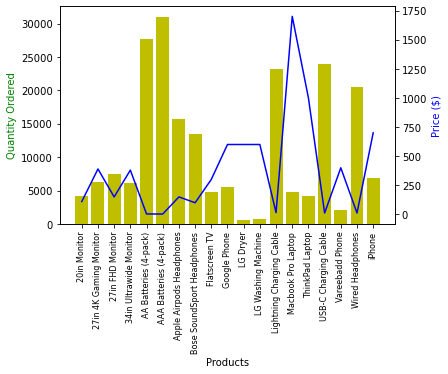

In [204]:
products = [product for product, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_orders, color='y')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()